### This project identifies the possible segmentation and patterns in customer data. The data is the Kaggle dataset "Mall Customer Segmentation Data", and includes five fields: ID, gender, age, annual income, & spending score. Mall (business) is most concerned for the customer's spending scores, so this project will try to find the patterns in the spending scores based on the most influenciing variable/variables.

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
# import data

customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### the statistics presented above shows no outliers, not any unsual min - max data.

In [4]:
# We don't need the customerId, so lets drop it.
customers = customers.drop(["CustomerID"], axis = 1)

## lets understand the individual variables.

Text(0.5, 1.0, 'Distribution of Gender')

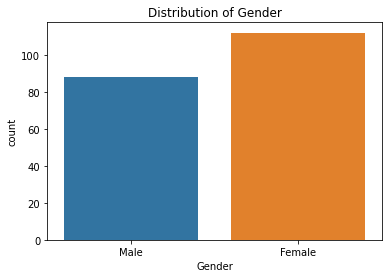

In [5]:
# distribution of gender

sns.countplot(x='Gender', data=customers)
plt.title('Distribution of Gender')

#### the data got more female than male, which may have influence in the cusotmer segmentation?

Text(0.5, 0, 'Age')

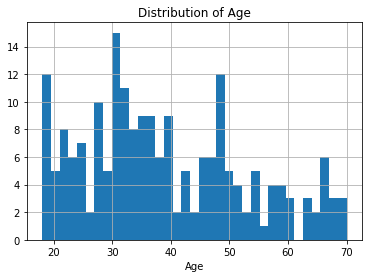

In [6]:
# age distrition:

customers.hist('Age', bins=35)
plt.title('Distribution of Age')
plt.xlabel('Age')


#### Customers of age between 30 to 40 are dominant, as suggested by the mean age of 38 above. the distribution of age shows right skewed, old age customers are lesser or the distribution have long right tail. Lets understand the distribution of customer age according to gender.

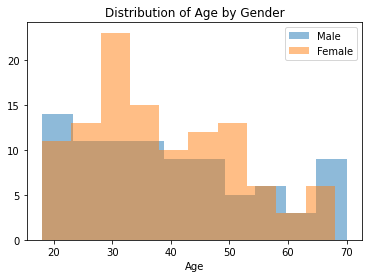

In [7]:
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha = 0.5, label='Male')
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha = 0.5, label = 'Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

#### The age by Gender distribution shows men are dominant in younger age (20 - 25 yrs) group and older age (65-70 yrs) group. Womens are dominant in the age group of 30 - 35 ages.

Text(0.5, 0, 'Thousands of Dollars')

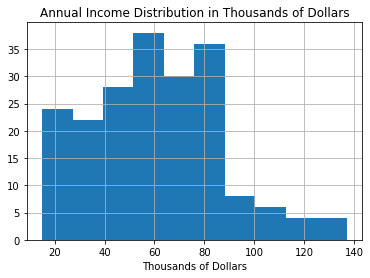

In [8]:
# income distribution

customers.hist('Annual Income (k$)')
plt.title('Annual Income Distribution in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')

#### Dominant customers lies between 55,000 and 85,000. Higher income customers (>$85K) are lesser in numbers

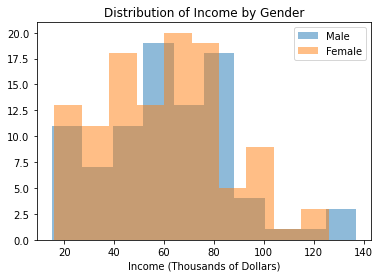

In [9]:
# The distribution of income according to Gender:

plt.hist('Annual Income (k$)', data = customers[customers['Gender'] == 'Male'], alpha = 0.5, label = 'Male')
plt.hist('Annual Income (k$)', data = customers[customers['Gender'] == 'Female'], alpha = 0.5, label = 'Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Income (Thousands of Dollars)')
plt.legend()

#### Looks like in genderal womens make less money than men. Higher income spikes are for men. Does this also correlates with the spending score?

In [10]:
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


C:\Users\aiukjk0\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age to Income, Colored by Gender')

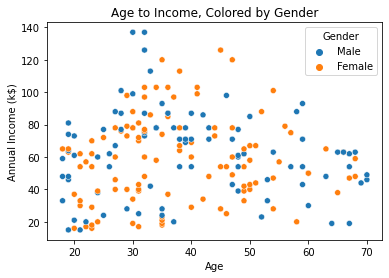

In [11]:
# women earn less but spend more. 

# lets plot the Age vs Annual Income according to Gender:

sns.scatterplot('Age', 'Annual Income (k$)', hue = 'Gender', data=customers)
plt.title('Age to Income, Colored by Gender')

<AxesSubplot:>

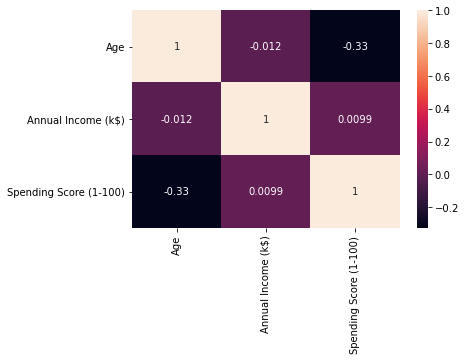

In [12]:
## There is no strong correlation between age vs income. Lets try to see if there is any correlation between numberical variables:

sns.heatmap(customers.corr(), annot=True)

C:\Users\aiukjk0\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age to Spending Score, Colored by Gender')

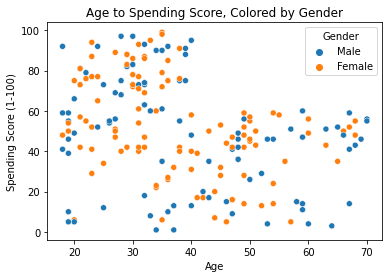

In [13]:
## larger correlation coeffiecnt = -0.33 between Age & Spending Score suggests older age customers spends less, but its 
    ## not a strong correlation.

sns.scatterplot('Age', 'Spending Score (1-100)', hue = 'Gender', data = customers)
plt.title('Age to Spending Score, Colored by Gender')

#### the plot shows a slight negative correlation between Age and Spending Score. 

Text(0.5, 1.0, 'Correlation Heatmap - Female')

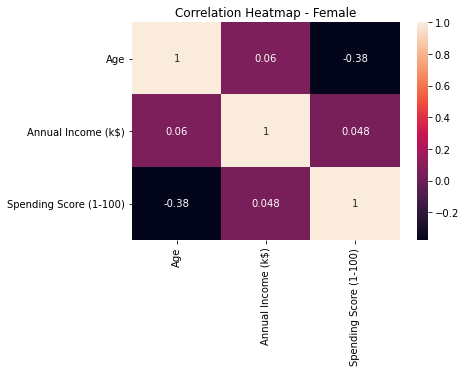

In [14]:
# what about the correlation coefficients according to Genders

sns.heatmap(female_customers.corr(), annot=True)
plt.title('Correlation Heatmap - Female')

Text(0.5, 1.0, 'Correlation Heatmap - Male')

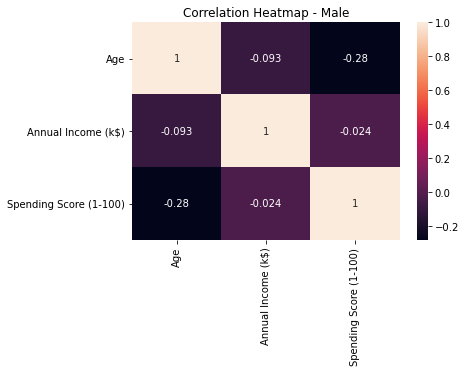

In [15]:
sns.heatmap(male_customers.corr(), annot=True)
plt.title('Correlation Heatmap - Male')

#### Above two correlation coefficient plot shows Age is more effective (-0.38 vs -0.28) in Spending Score for women than men, though both coefficients are small.

C:\Users\aiukjk0\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Annual Income to Spending Score, Colored by Gender')

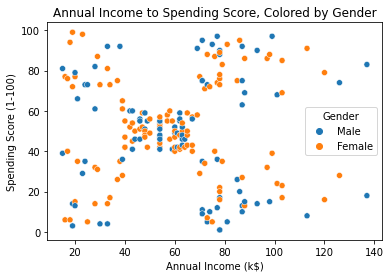

In [16]:
# What about the relationship between 'Annual Income (k$)' and 'Spending Score' according to Gender?

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue = 'Gender', data=customers)
plt.title('Annual Income to Spending Score, Colored by Gender')

#### Above chart shows the possible groups of Low Income/Low Spending Score, Low Income/High Spending Score, Mid Income/Mid Spending Score, High Income/Low Spending Score, & High Income/High Spending Score.

#### The Income vs Spending Score shows better clustering than age vs spending score, so Income - Spending Score is better for clustering.